In [1]:
import os
import numpy as np
import networkx as nx
import matching.glema.common.utils as utils
import matching.misc.cpg_const as cpg_const

In [2]:
args = utils.parse_args( use_default=True )
args.dataset = "CPG"
args.directed = True
args.iso = True
args.test_data = True

In [3]:
record_scopes = utils.get_record_scopes( args )
design_patterns = utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [4]:
source_graph_idx = 8
query_subgraph_idx = 0

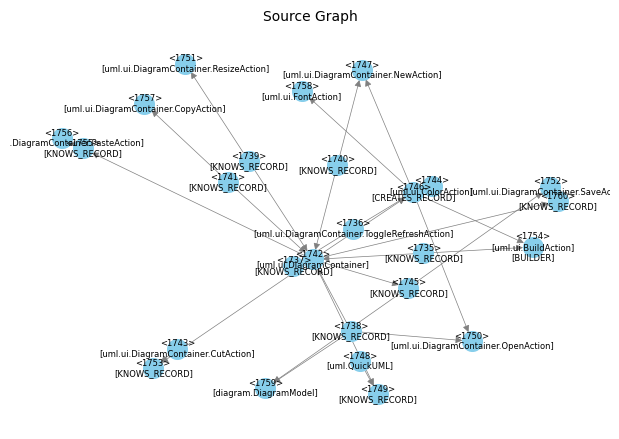

In [6]:
source = utils.get_source_graph( args, source_graph_idx )
utils.plot_graph( source,
                  title="Source Graph",
                  nodeLabels=utils.get_node_labels( source, **label_args ) )

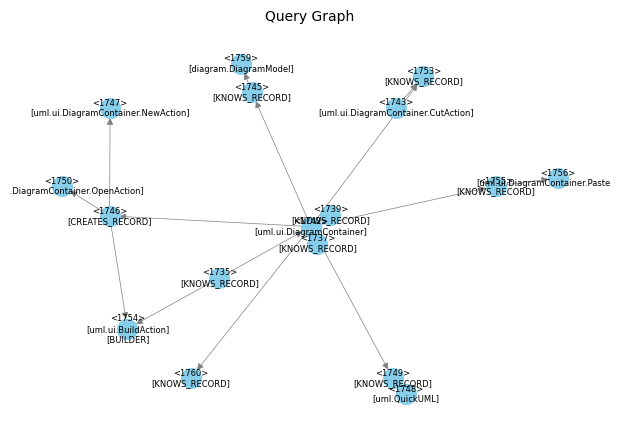

In [7]:
query = utils.load_query( args, source_graph_idx, query_subgraph_idx )
utils.plot_graph( query,
                  title="Query Graph",
                  nodeLabels=utils.get_node_labels( query, **label_args ) )

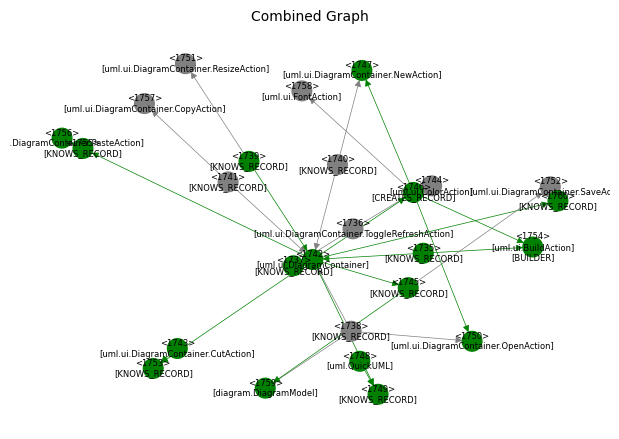

In [8]:
matching_colors = {
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = utils.combine_graph( source, query,
                                                          matching_colors=matching_colors )
utils.plot_graph(
    title="Combined Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=utils.get_node_labels( combined, **label_args )
)